In [1]:
import importlib
 
if importlib.util.find_spec('fsspec') is None:
  !pip install fsspec
if importlib.util.find_spec('s3fs') is None:
  !pip install s3fs
  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
%matplotlib inline

In [2]:
df = pd.read_excel('s3://lfspf/Portfolio.xls')

In [3]:
df.head(2)

,date,country,sector,exposure,mtd,nav,strategy,type,issuer
0,2018-01-31,Switzerland,"Consumer, Non-cyclical",0.0,0.0,1.884133e+08,SPECIAL SITUATIONS,Equity,Degroof
1,2018-01-31,Sweden,"Consumer, Non-cyclical",0.0,0.0,1.884133e+08,CAPITAL MARKETS,Equity,SVENSKA CELLULOSA AB SCA


In [4]:
df.tail(2)

,date,country,sector,exposure,mtd,nav,strategy,type,issuer
22091,2018-12-31,United States,Future,-3.757875e+06,-1.667176e+05,1.019061e+08,SPECIAL SITUATIONS,Future,SPX Index
22092,2018-12-31,Canada,Basic Materials,2.510541e+06,-1.158847e+06,1.019061e+08,CAPITAL MARKETS,Equity,Cobalt 27 Capital Corp


In [5]:
df['mtd%'] = df['mtd']/df['nav']
df['exposure%'] = df['exposure']/df['nav']

In [6]:
df_issuer = df.groupby('issuer').sum()

In [7]:
df_winners = df_issuer.sort_values(by='mtd%',ascending=False).head(5)

In [8]:
df_winners.columns=['EX','MTD','NAV','MTD%','EX%']
df_winners

,EX,MTD,NAV,MTD%,EX%
issuer,,,,,
Sky PLC,9.359811e+07,7.509217e+06,1.107022e+10,0.039597,5.125456e-01
CME Group Inc,-1.148650e+07,5.188004e+06,7.577057e+08,0.031725,-6.454781e-02
CVS Health Corp,-2.880760e+06,4.048054e+06,3.980991e+08,0.030274,-1.771543e-02
INFORMA PLC,1.102784e+01,4.947013e+06,1.120873e+09,0.026223,5.845508e-08
Worldpay Inc,0.000000e+00,4.870856e+06,6.285123e+09,0.025852,0.000000e+00


In [9]:
df_losers = df_issuer.sort_values(by='mtd%',ascending=True).head(5)
df_losers.columns=['EX','MTD','NAV','MTD%','EX%']
df_losers

,EX,MTD,NAV,MTD%,EX%
issuer,,,,,
Cobalt 27 Capital Corp,6.954105e+07,-7.124498e+06,4.743689e+09,-0.046140,0.391730
Spaxs SpA,1.264044e+08,-4.179590e+06,4.190082e+09,-0.031567,0.739033
NEX Group PLC,1.994713e+07,-4.930047e+06,7.577057e+08,-0.029696,0.112221
NXP Semiconductors NV,1.283201e+08,-5.191723e+06,1.436283e+10,-0.028776,0.681375
Aetna Inc,9.424000e+06,-3.715777e+06,2.493140e+09,-0.027715,0.057954


In [10]:
df['date'].unique().shape

(12,)

In [11]:
df_pnl = df.groupby('issuer').sum()['mtd']
df_exp = df.groupby('issuer').mean()['exposure']

In [12]:
pd.concat([df_pnl,df_exp],axis=1).head(4)

,mtd,exposure
issuer,,
3 Month Euroswiss Future,-316.404213,0.0
888 Holdings PLC,0.000000,0.0
AA PLC,0.000000,0.0
ABB Ltd,0.000000,0.0


In [13]:
df_pnl = df.groupby('strategy').sum()['mtd%']*100

In [14]:
df_pnl

strategy
ARBITRAGE              1.269347
CAPITAL MARKETS      -21.167305
SPECIAL SITUATIONS    -0.721946
Name: mtd%, dtype: float64

In [15]:
df_pnl = df.groupby('date').sum()['mtd%']
df_pnl

date
2018-01-31    0.054107
2018-02-28   -0.021651
2018-03-30   -0.011636
2018-04-30   -0.007467
2018-05-31   -0.002503
2018-06-29    0.003335
2018-07-31   -0.020540
2018-08-31   -0.001832
2018-09-28   -0.020825
2018-10-31   -0.111300
2018-11-30   -0.014185
2018-12-31   -0.051702
Name: mtd%, dtype: float64

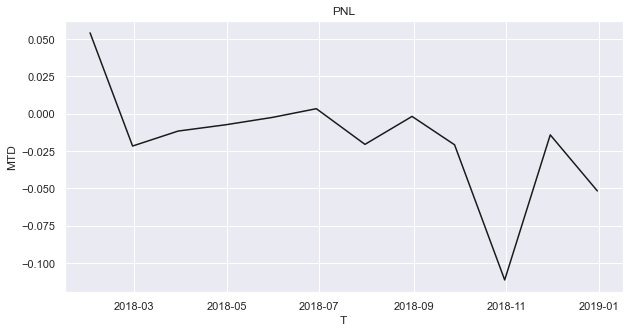

In [16]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(df_pnl.index,df_pnl,'k');
ax.set_xlabel('T')
ax.set_ylabel('MTD')
ax.set_title('PNL');

PNL by strategy and over time

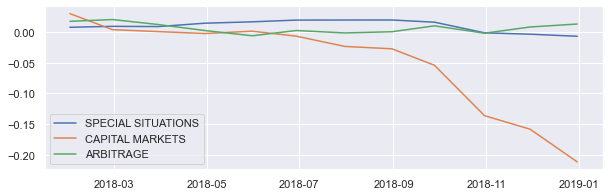

In [17]:
fig, ax = plt.subplots(1,1,figsize=(10,3))
for s in df['strategy'].unique():
    idx = df['strategy']==s
    df_2_plot = df.loc[idx,:]
    df_2_plot = df_2_plot.groupby('date').sum()['mtd%']
    ax.plot(df_2_plot.index,np.cumsum(df_2_plot),label=s)
ax.legend();

In [18]:
df_piv = df.pivot_table(columns='country',
               index='sector',
               values='mtd%',
               aggfunc=[np.sum, max ,min],
               margins=True,
               margins_name='Total')

In [19]:
df_piv = df_piv.fillna(value=0)

In [20]:
df.groupby(['strategy','issuer']).sum()

exposure  \
strategy           issuer                                                             
ARBITRAGE          ABBOTT LABORATORIES                                 0.000000e+00   
                   ACS Actividades de Construccion y Servicios SA      0.000000e+00   
                   ALPI SpA/Italy                                      5.406832e+06   
                   ANSALDO STS SPA                                     1.456150e+07   
                   ARM HOLDINGS PLC                                    0.000000e+00   
...                                                                             ...   
SPECIAL SITUATIONS iShares MSCI Japan ETF                              0.000000e+00   
                   iShares iBoxx $ High Yield Corporate Bond ETF       0.000000e+00   
                   iShares iBoxx $ Investment Grade Corporate Bond...  0.000000e+00   
                   iShares iBoxx High Yield Corporate Bond ETF         0.000000e+00   
                   va-Q-tec AG                                         0.000000e+00   

                                                                                 mtd  \
strategy           issuer                                                              
ARBITRAGE          ABBOTT LABORATORIES                                      0.000000   
                   ACS Actividades de Construccion y Servicios SA           0.000000   
                   ALPI SpA/Italy                                      147412.713293   
                   ANSALDO STS SPA                                     331495.912526   
                   ARM HOLDINGS PLC                                         0.000000   
...                                                                              ...   
SPECIAL SITUATIONS iShares MSCI Japan ETF                               13692.000000   
                   iShares iBoxx $ High Yield Corporate Bond ETF       -11384.400000   
                   iShares iBoxx $ Investment Grade Corporate Bond...   75063.371700   
                   iShares iBoxx High Yield Corporate Bond ETF              0.000000   
                   va-Q-tec AG                                              0.000000   

                                                                                nav  \
strategy           issuer                                                             
ARBITRAGE          ABBOTT LABORATORIES                                 2.095041e+09   
                   ACS Actividades de Construccion y Servicios SA      2.095041e+09   
                   ALPI SpA/Italy                                      3.980991e+08   
                   ANSALDO STS SPA                                     5.710788e+08   
                   ARM HOLDINGS PLC                                    2.095041e+09   
...                                                                             ...   
SPECIAL SITUATIONS iShares MSCI Japan ETF                              1.906628e+09   
                   iShares iBoxx $ High Yield Corporate Bond ETF       1.337335e+09   
                   iShares iBoxx $ Investment Grade Corporate Bond...  2.095041e+09   
                   iShares iBoxx High Yield Corporate Bond ETF         7.577057e+08   
                   va-Q-tec AG                                         2.095041e+09   

                                                                           mtd%  \
strategy           issuer                                                         
ARBITRAGE          ABBOTT LABORATORIES                                 0.000000   
                   ACS Actividades de Construccion y Servicios SA      0.000000   
                   ALPI SpA/Italy                                      0.001415   
                   ANSALDO STS SPA                                     0.001749   
                   ARM HOLDINGS PLC                                    0.000000   
...                                                                         ...   
SP